# Topic 4 - Obtaining Financial Markets Data

## 1. Basics of portfolio construction

We will cover a few basics necessary to understand more advanced ideas behind portfolio construction.
- Portfolio returns
- Covariance
- Portfolio standard deviation

In [1]:
# Required libraries

import pandas as pd
import math
import numpy as np
import yfinance as yf

In [2]:
# We will focus on stock prices for Google and Microsoft between January 4, 2016 and December 29, 2017.

# Define the ticker list
tickers_list = ['AAPL', 'GOOG']

# Download the data for the above tickers and extract the Adj Close column
stock_prices = yf.download(tickers_list, start='2016-01-01', end='2017-12-31')['Adj Close']

# Set the index to a datetime object
stock_prices.index = pd.to_datetime(stock_prices.index)

# Display the first 5 rows
stock_prices.head()

[*********************100%%**********************]  2 of 2 completed


,AAPL,GOOG
Date,,
2016-01-04,23.946917,37.091999
2016-01-05,23.346825,37.129002
2016-01-06,22.889935,37.181000
2016-01-07,21.923880,36.319500
2016-01-08,22.039808,35.723499


In [3]:
# Calculate the daily returns
price_returns = stock_prices.pct_change()

# Drop the rows with NaN values
price_returns.dropna(inplace=True)
price_returns

,AAPL,GOOG
Date,,
2016-01-05,-0.025059,0.000998
2016-01-06,-0.019570,0.001400
2016-01-07,-0.042204,-0.023170
2016-01-08,0.005288,-0.016410
2016-01-11,0.016192,0.002183
...,...,...
2017-12-22,0.000000,-0.003300
2017-12-26,-0.025370,-0.003188
2017-12-27,0.000176,-0.006974


In [4]:
# Simple annualized returns

annual_returns = price_returns.mean()*252
annual_returns

AAPL    0.278474
GOOG    0.188612
dtype: float64

In [5]:
# Simple annualize standard deviation

annual_sd = price_returns.std()*math.sqrt(252)
annual_sd

AAPL    0.206946
GOOG    0.178125
dtype: float64

### a. Portfolio returns

The portfolio returns are equal to the weight in stock a times the returns of stock a plus the weight in stock b * the returns of stock b.

$Portfolio\ Return = w_a * R_a + w_b * R_b + ...$

In [6]:
# Assume equal weights
wx = 0.5
wy = 0.5

# Calculate portfolio returns
portfolio_returns = wx*annual_returns['AAPL'] + wy*annual_returns['GOOG']

# Print the portfolio returns
print("The portfolio return is:", str(round(portfolio_returns*100, 2))+"%.")
print(f'The portfolio return is: {str(round(portfolio_returns*100, 2))}%.')

The portfolio return is: 23.35%.
The portfolio return is: 23.35%.


### b. Covariance

Covariance is a measure of the joint variability between two variables. In simple terms, it is a measure of how much two variables vary together. Covariance will have a large impact on your portfolio.

$Covariance = \sum( \frac {(x - \bar{x}) * (y - \bar{y})}n)$


In [7]:
# Calculate the covariance of the stocks and multiply it by 252 to get annualised covariance
cov_msft_goog = np.cov(price_returns['AAPL'], price_returns['GOOG'])*252

# Print the covariance value of MSFT and GOOGL (ie. top right corner)
print("The covariance of MSFT and GOOGL is: ", round(cov_msft_goog[0, 1], 4))

The covariance of MSFT and GOOGL is:  0.0177


### c. Portfolio standard deviation
We can now calculate the standard deviation of our portfolio. Unlike with portfolio returns, we cannot simply combine them. Because stocks have covariance between eachother, risk can be offset. For example, when one stock goes up, another may go down. These opposite movements will reduce the portfolio risk. There are faster but more mathematically complex methods for calculating portfolio standard deviation, but for now we will focus on using the basic formula. You will cover other approaches in your portfolio theory class.

$Portfolio\ Standard\ Deviation = \sqrt{wx^2*\sigma^2_x+wy^2*\sigma^2_y+2*wx*wb*Cov(x,y)}$

In [8]:
# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((wx**2)*(annual_sd['AAPL']**2) + (wy**2)*(annual_sd['GOOG']**2) + 2*wx*wy*cov_msft_goog[0, 1])

# Print the portfolio standard deviation
print("The standard deviation of MSFT is: ", str(round(annual_sd['AAPL']*100, 2))+"%")
print("The standard deviation of GOOG is: ", str(round(annual_sd['GOOG']*100, 2))+"%")
print("The portfolio standard deviation is: ", str(round(portfolio_std_dev*100, 2))+"%")

The standard deviation of MSFT is:  20.69%
The standard deviation of GOOG is:  17.81%
The portfolio standard deviation is:  16.58%


Notice that we are able to create a portfolio of just two stocks that has significantly reduced the risk of investing in either of these two stocks individually. This is the benefit of diversification and why covariance is important when creating a portfolio.

### a. Daily price data

To download the daily price data, you will use the `yfinance` module to download the data from Yahoo! Finance.

Yahoo! Finance provides market data on cryptocurrencies, regular currencies, commodity futures, stocks and bonds, fundamental and options data, and market analysis and news.

You can then use the `download()` method of the `yfinance` package to download the dataset.

Syntax:
```python
import yfinance as yf
yf.download(ticker, start, end)
```

Parameters:
1. **ticker:** Ticker of the asset
2. **start:** Start date
3. **end:** End date, if not specified, data is downloaded till current data

Returns:<br>
A `pandas` dataframe containing the open, high, low, close and adjusted close price along with the volume for all the trading days between the start and the end date.

After downloading the data, you can use `matplotlib` to visualise the data.

## 2. Modern portfolio theory

We will cover a few topics that you have likely seen before in other courses.
- Collect data
- Calculate portfolio returns and risk
- Change our stocks
- Change the amount we invest in each stock
- Create the efficient frontier
- Calculate the optimal weights

In [9]:
import matplotlib.pyplot as plt

### a. Collect the data

In [10]:
# We will focus on stock prices for Google and Microsoft between January 4, 2016 and December 29, 2017.

# Define the ticker list
tickers_list = ['CVX', 'GOOG', 'MSFT']

# Download the data for the above tickers and extract the Adj Close column
stock_prices = yf.download(tickers_list, start='2016-01-01', end='2017-12-31')['Adj Close']

# Set the index to a datetime object
stock_prices.index = pd.to_datetime(stock_prices.index)

# Display the first 5 rows
stock_prices.head()

[*********************100%%**********************]  3 of 3 completed


,CVX,GOOG,MSFT
Date,,,
2016-01-04,62.537277,37.091999,48.608986
2016-01-05,63.072224,37.129002,48.830746
2016-01-06,60.580585,37.181000,47.943714
2016-01-07,58.433846,36.319500,46.276112
2016-01-08,57.807404,35.723499,46.418049


### b. Calculate portfolio return and risk

In [11]:
# Calculate the daily returns
price_returns = stock_prices.pct_change()

# Drop the rows with NaN values
price_returns.dropna(inplace=True)
price_returns

,CVX,GOOG,MSFT
Date,,,
2016-01-05,0.008554,0.000998,0.004562
2016-01-06,-0.039505,0.001400,-0.018165
2016-01-07,-0.035436,-0.023170,-0.034783
2016-01-08,-0.010721,-0.016410,0.003067
2016-01-11,-0.016559,0.002183,-0.000574
...,...,...,...
2017-12-22,0.001282,-0.003300,0.000117
2017-12-26,0.008001,-0.003188,-0.001286
2017-12-27,-0.003413,-0.006974,0.003630


In [12]:
# Simple annualized returns

annual_returns = price_returns.mean()*252
annual_returns

CVX     0.232446
GOOG    0.188612
MSFT    0.266620
dtype: float64

In [13]:
# Simple annualize standard deviation

annual_sd = price_returns.std()*math.sqrt(252)
annual_sd

CVX     0.194228
GOOG    0.178125
MSFT    0.191515
dtype: float64

In [14]:
# Assume equal weights
wx = 0.5
wy = 0.5

# Calculate portfolio returns
portfolio_returns = wx*annual_returns['MSFT'] + wy*annual_returns['GOOG']

# Calculate the covariance of the stocks and annualize it by multiplying with 252
cov_msft_goog = np.cov(price_returns['MSFT'], price_returns['GOOG'])*252

# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((wx**2)*(annual_sd['MSFT']**2) + (wy**2)*(annual_sd['GOOG']**2) + 2*wx*wy*cov_msft_goog[0, 1])
portfolio_std_dev

0.16893219710221258

In [15]:
portfolio_returns

0.2276159424673379

In [16]:
# We will now evaluate this portfolio by the units of return you earn per unit of risk
print("The portfolio returns per portfolio standard deviation is:", round(portfolio_returns/portfolio_std_dev, 2))

The portfolio returns per portfolio standard deviation is: 1.35


In [17]:
# An alternative method, we will not cover this method beyond this example.

portfolio = np.array([0, .5, .5])

rets = price_returns[['CVX', 'MSFT', 'GOOG']]

matrix_covariance_portfolio = rets
matrix_covariance_portfolio = (matrix_covariance_portfolio.cov())*252
matrix_covariance_portfolio

,CVX,MSFT,GOOG
CVX,0.037725,0.009367,0.005833
MSFT,0.009367,0.036678,0.022873
GOOG,0.005833,0.022873,0.031729


In [18]:
portfolio_variance = np.dot(portfolio.T,np.dot(matrix_covariance_portfolio, portfolio))

#standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.16893219710221255

### c. Change the stocks

In [19]:
# Calculate the covariance of the stocks and annualize it by multiplying with 252
cov_msft_cvx = np.cov(price_returns['MSFT'], price_returns['CVX'])*252
print("The covariance of MSFT and CVX is: ", cov_msft_cvx[0, 1])

The covariance of MSFT and CVX is:  0.009367430546642588


In [20]:
# Assume equal weights
wx = 0.5
wy = 0.5

# Calculate portfolio returns
portfolio_returns = wx*annual_returns['MSFT'] + wy*annual_returns['CVX']

# Calculate the covariance of the stocks and annualize it by multiplying with 252
cov_msft_goog = np.cov(price_returns['MSFT'], price_returns['CVX'])*252

# Calculate portfolio standard deviation
portfolio_std_dev = math.sqrt((wx**2)*(annual_sd['MSFT']**2) + (wy**2)*(annual_sd['CVX']**2) + 2*wx*wy*cov_msft_cvx[0, 1])
portfolio_std_dev

0.1525923128941265

In [21]:
portfolio_returns

0.24953303775700217

In [22]:
# We will now evaluate this portfolio by the units of return you earn per unit of risk
print("The portfolio returns per portfolio standard deviation is: ", round(portfolio_returns/portfolio_std_dev, 2))

The portfolio returns per portfolio standard deviation is:  1.64


### d. Change the weights
Rather than changing the stocks, we can also alter the performance of the portfolio by altering the weights we place in each stock. We will generate 500 portfolios with different weights. We will calculat ethe portfolio performance and evaluate.

In [23]:
# Create an empty dataframe
portfolio = pd.DataFrame()

# Initialize the number of portfolios
num_of_portfolios = 500

# Run the loop for each portfolio
for i in range(num_of_portfolios):
    # Generate a and b values randomly by using numpy random function.
    # The argument '1' ensures the values generated are between 0 and 1
    wx = np.random.random(1)[0]
    wy = 1-wx
    portfolio.loc[i, 'cvx_weight'] = wx
    portfolio.loc[i, 'msft_weight'] = wy

    # Save the portfolio returns and portfolio standard deviation values along with its ratio
    portfolio.loc[i, 'returns'] = wx * annual_returns['CVX'] + wy*annual_returns['MSFT']

    portfolio.loc[i, 'std_dev'] = math.sqrt((wx**2)*(annual_sd['CVX']**2) +
                                            (wy**2)*(annual_sd['MSFT']**2)
                                            + 2*wx*wy*cov_msft_cvx[0, 1])

    portfolio.loc[i, 'returns per std_dev'] = portfolio.loc[i, 'returns'] / portfolio.loc[i, 'std_dev']

In [24]:
# Identify the portfolio with maximum returns/standard deviation using idxmax() function
max_ret_by_std_dev = portfolio.iloc[portfolio['returns per std_dev'].idxmax()]
print('Max Ratio')
print(max_ret_by_std_dev)

print('')

# Similarly identify the portfolio with maximum return
max_ret = portfolio.iloc[portfolio['returns'].idxmax()]
print('Max Return')
print(max_ret)

print('')

# Similarly identify the portfolio with minimum standard deviation
min_std_dev = portfolio.iloc[portfolio['std_dev'].idxmin()]
print('Min Risk')
print(min_std_dev)

Max Ratio
cvx_weight             0.433740
msft_weight            0.566260
returns                0.251797
std_dev                0.153165
returns per std_dev    1.643964
Name: 429, dtype: float64

Max Return
cvx_weight             0.002175
msft_weight            0.997825
returns                0.266546
std_dev                0.191206
returns per std_dev    1.394028
Name: 469, dtype: float64

Min Risk
cvx_weight             0.489720
msft_weight            0.510280
returns                0.249884
std_dev                0.152576
returns per std_dev    1.637766
Name: 102, dtype: float64


### e. Plot the efficient frontier (ie. the 500 random portfolios we have created)

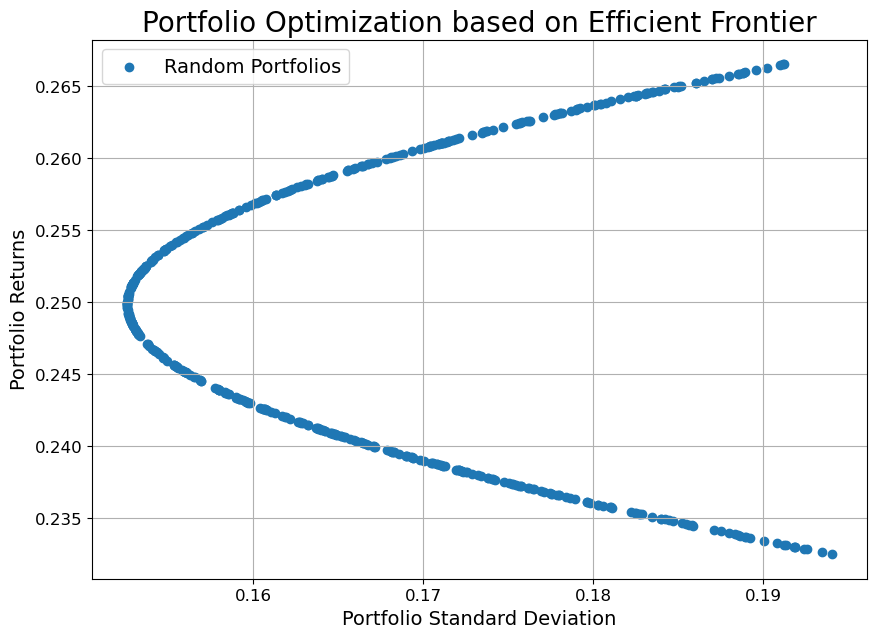

In [25]:
# Plot the portfolios
plt.figure(figsize=(10, 7))
plt.grid()
plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')
plt.legend(loc='best', fontsize=14)
plt.show()

In [26]:
max_ret_by_std_dev

cvx_weight             0.433740
msft_weight            0.566260
returns                0.251797
std_dev                0.153165
returns per std_dev    1.643964
Name: 429, dtype: float64

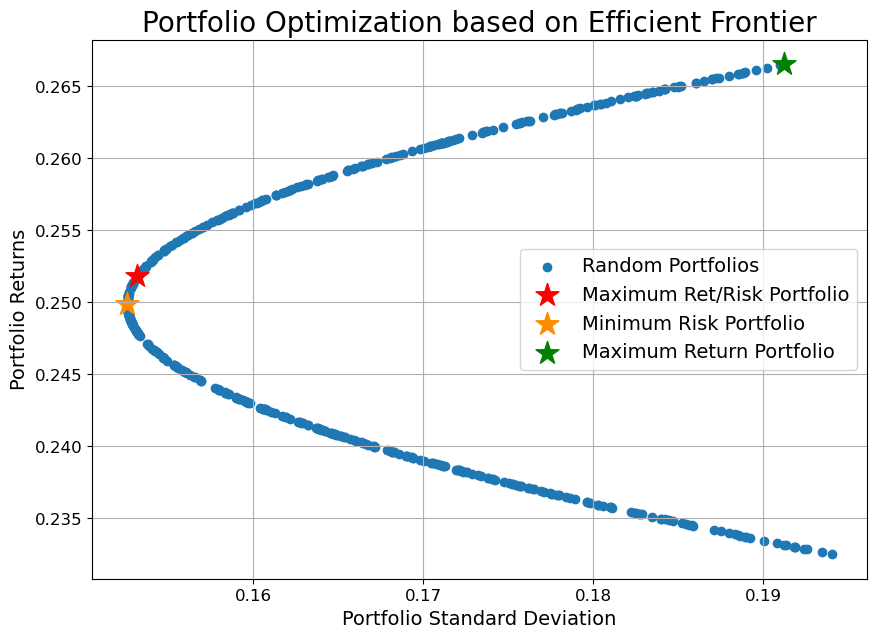

In [27]:
# Highlight the maximum returns/risk portfolio and minimum risk portfolio
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(portfolio.std_dev, portfolio.returns, label='Random Portfolios')

plt.scatter(max_ret_by_std_dev.std_dev, max_ret_by_std_dev.returns,
            marker='*', s=300, color='r', label='Maximum Ret/Risk Portfolio')

plt.scatter(min_std_dev.std_dev, min_std_dev.returns,
            marker='*', s=300, color='darkorange', label='Minimum Risk Portfolio')

plt.scatter(max_ret.std_dev, max_ret.returns,
            marker='*', s=300, color='green', label='Maximum Return Portfolio')

plt.xlabel('Portfolio Standard Deviation', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Portfolio Returns', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(loc='best', fontsize=14)
plt.title('Portfolio Optimization based on Efficient Frontier', fontsize=20)
plt.show()

### f. Obtain the optimal weights from the best portfolio

In [28]:
# Use iloc on the row to obtain the optimal weights
optimal_weights = max_ret_by_std_dev[["cvx_weight", "msft_weight"]]

# Print the optimal weights of MSFT and CVX
print("The optimal weight of CVX is: ", str(round(optimal_weights[0]*100, 2))+"%")

print("The optimal weight of MSFT is: ", str(round(optimal_weights[1]*100, 2))+"%")

The optimal weight of CVX is:  43.37%
The optimal weight of MSFT is:  56.63%


## 3. Beta

We will revisit the idea of beta from your prior courses. We will have to:
- Calculate daily returns
- Calculate beta using a regression
- Calculate beta using variance-covariance

### a. Get data and calculate daily returns

In [29]:
# We will focus on stock prices for Google and Microsoft between January 4, 2016 and December 29, 2017.

# Define the ticker list
tickers_list = ['AMZN', 'SPY']

# Download the data for the above tickers and extract the Adj Close column
stock_prices = yf.download(tickers_list, start='2021-01-01', end='2022-02-04')['Adj Close']

# Set the index to a datetime object
stock_prices.index = pd.to_datetime(stock_prices.index)

# Display the first 5 rows
stock_prices.head()

[*********************100%%**********************]  2 of 2 completed


,AMZN,SPY
Date,,
2021-01-04,159.331497,352.767151
2021-01-05,160.925507,355.196747
2021-01-06,156.919006,357.320282
2021-01-07,158.108002,362.629242
2021-01-08,159.134995,364.695312


In [30]:
# Calculate the daily returns of Amazon
stock_prices['daily_amazon_returns'] = stock_prices.AMZN.pct_change()

# Calculate the daily returns of S&P500
stock_prices['daily_spy_returns'] = stock_prices.SPY.pct_change()

# Drop NaN values
stock_prices = stock_prices.dropna()

# Print the first five rows of data dataframe
stock_prices.head()

,AMZN,SPY,daily_amazon_returns,daily_spy_returns
Date,,,,
2021-01-05,160.925507,355.196747,0.010004,0.006887
2021-01-06,156.919006,357.320282,-0.024897,0.005978
2021-01-07,158.108002,362.629242,0.007577,0.014858
2021-01-08,159.134995,364.695312,0.006496,0.005697
2021-01-11,155.710495,362.237030,-0.021519,-0.006741


### b. Calculate beta from a regression
We have daily returns of Amazon and S&P500. We will use the ordinary least square (OLS) regression to calculate the Beta of the Amazon.

For that, we will use the OLS function from statsmodels library.

Syntax:

`OLS(y, X)`

In our case, `y` = daily_amazon_returns and `X` = daily_spy_returns

In [31]:
# Import statsmodels library
import statsmodels.api as sm

# Create a regression model
reg = sm.OLS(stock_prices['daily_amazon_returns'], stock_prices['daily_spy_returns'])

# Fit the model
results = reg.fit()

# Print the beta of Amazon
print('Beta of Amazon: %.2f' % results.params[0])

Beta of Amazon: 1.19


In [32]:
# An alternative method that we used in FIN 6060 (-1 in the formula removes the intercept to match above)

from statsmodels.formula.api import ols

ols('daily_amazon_returns ~ daily_spy_returns - 1', stock_prices).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     daily_amazon_returns   R-squared (uncentered):                   0.387
Model:                              OLS   Adj. R-squared (uncentered):              0.384
Method:                   Least Squares   F-statistic:                              172.0
Date:                  Tue, 27 Feb 2024   Prob (F-statistic):                    8.29e-31
Time:                          14:25:02   Log-Likelihood:                          802.28
No. Observations:                   274   AIC:                                     -1603.
Df Residuals:                       273   BIC:                                     -1599.
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
daily_spy_returns     1.1924      0.091     13.116      0.000       1.013       1.371
==============================================================================
Omnibus:                       37.808   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.008
Skew:                          -0.445   Prob(JB):                     2.96e-35
Kurtosis:                       6.624   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 4. Three Factor Model
The three factor model is an extension of the CAPM. We will utilize this model to calculate the expected returns of a stock.

$ ER_i = RF + Systematic Risk Premium + Size Factor + Value Factor$

$ ER_i = R_f + \beta_1(R_m - R_f) + \beta_2(SMB) + \beta_3(HML)$

### a. Calculate both daily and excess returns for a stock

In [33]:
# We can obtain this data from Yahoo Finance and https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html,
# but for ease we will open this data from an already prepared csv file.

data = pd.read_csv('factor_data.csv', index_col=0, parse_dates=['date'])
data.head()

,market_excess_returns,SMB,HML,risk_free_rate,amazon_price
date,,,,,
2016-05-02,0.78,-0.01,-0.36,0.001,93.64
2016-05-03,-1.05,-0.66,-0.49,0.001,95.18
2016-05-04,-0.66,-0.15,0.06,0.001,94.19
2016-05-05,-0.08,-0.50,0.09,0.001,93.24
2016-05-06,0.38,0.05,0.24,0.001,92.72


In [34]:
# Calculate the daily returns of Amazon
data['daily_amazon_returns'] = data.amazon_price.pct_change() * 100

# Drop the NaN values
data = data.dropna()

# Print first five rows of data
data.head()

,market_excess_returns,SMB,HML,risk_free_rate,amazon_price,daily_amazon_returns
date,,,,,,
2016-05-03,-1.05,-0.66,-0.49,0.001,95.18,1.644596
2016-05-04,-0.66,-0.15,0.06,0.001,94.19,-1.040134
2016-05-05,-0.08,-0.50,0.09,0.001,93.24,-1.008600
2016-05-06,0.38,0.05,0.24,0.001,92.72,-0.557701
2016-05-09,0.05,0.36,-1.48,0.001,92.79,0.075496


In [35]:
# Calculate the Amazon excess returns
data['amazon_excess_returns'] = data['daily_amazon_returns'] - data['risk_free_rate']

# Print first five rows of data
data.head()

,market_excess_returns,SMB,HML,risk_free_rate,amazon_price,daily_amazon_returns,amazon_excess_returns
date,,,,,,,
2016-05-03,-1.05,-0.66,-0.49,0.001,95.18,1.644596,1.643596
2016-05-04,-0.66,-0.15,0.06,0.001,94.19,-1.040134,-1.041134
2016-05-05,-0.08,-0.50,0.09,0.001,93.24,-1.008600,-1.009600
2016-05-06,0.38,0.05,0.24,0.001,92.72,-0.557701,-0.558701
2016-05-09,0.05,0.36,-1.48,0.001,92.79,0.075496,0.074496


### b. Calculate the coefficients of the 3-factors (ie. beta)

In [36]:
# Import the statsmodels library
import statsmodels.api as sm

# Independent variables
X = data[['market_excess_returns', 'SMB', 'HML']]

# Dependent variable
y = data['amazon_excess_returns']

# Create a regression model
reg = sm.OLS(y, X).fit()

# Print beta of market_excess_returns
print('Beta of market_excess_returns= ', reg.params[0])

# Print beta of SMB
print('Beta of SMB= ', reg.params[1])

# Print beta of HML
print('Beta of HML= ', reg.params[2])

Beta of market_excess_returns=  1.1545046729816602
Beta of SMB=  -0.27358778926285166
Beta of HML=  -0.7171104348708253


### c. Calculate the annualized returns of the 3-factors

In [37]:
# Calculate the annualized market excess returns
annualized_market_excess_returns = ((data['market_excess_returns']/100 + 1).cumprod()[-1]) ** (252/len(data)) - 1

# Print annualized market excess returns
annualized_market_excess_returns

0.13889333362659628

In [38]:
# Calculate the annualized SMB returns
annualized_SMB_returns = ((data.SMB/100 + 1).cumprod()[-1]) ** (252/len(data)) - 1

# Print annualized_SMB_returns
annualized_SMB_returns

-0.002627390164124943

In [39]:
# Calculate the annualized HML returns
annualized_HML_returns = ((data.HML/100 + 1).cumprod()[-1]) ** (252/len(data)) - 1

# Print annualized_HML_returns
annualized_HML_returns

-0.048414947762249416

In [40]:
# Calculate annualised risk-free rate returns
annualized_risk_free_rate_returns = (data.risk_free_rate/100 + 1).cumprod()[-1] ** (252/len(data)) - 1

# Print annualised_risk_free_rate_returns
annualized_risk_free_rate_returns

0.01196786051367904

### d. Calculate the annualized expected return of the stock
Remember:
$ ER_i = R_f + \beta_1(R_m - R_f) + \beta_2(SMB) + \beta_3(HML)$

In [41]:
# Calculate the expected returns of Amazon
expected_returns_amazon = annualized_risk_free_rate_returns \
                        + reg.params[0] * annualized_market_excess_returns \
                        + reg.params[1] * annualized_SMB_returns \
                        + reg.params[2] * annualized_HML_returns

# Print expected returns of Amazon
print('Expected Returns of Amazon: %.2f' % (expected_returns_amazon * 100))

Expected Returns of Amazon: 20.78


## 5. Factor Investing
We will now focus on creating and using the momentum factor.

In [42]:
import matplotlib.pyplot as plt
import datetime as dt

# Need to import the matplotlib_converters from pandas,
# whenever you try to plot the columns of a dataframe using a for loop
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### a. Open the data and calculate returns

In [43]:
df = pd.read_csv('stocks_and_factors.csv', index_col=[0])
df.head()

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
Date,,,,,,,
2012-01-03,179.03,74.22,5.80,26.62,26.765,66.83,39.73
2012-01-04,177.51,74.33,5.81,26.60,27.400,66.80,39.21
2012-01-05,177.61,73.53,6.31,26.50,27.680,66.52,38.94
2012-01-06,182.61,73.98,6.18,26.40,28.105,66.36,38.33
2012-01-09,178.56,74.53,6.27,26.44,27.740,66.64,38.37


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 2012-01-03 to 2017-12-29
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1509 non-null   float64
 1   BA      1509 non-null   float64
 2   BAC     1509 non-null   float64
 3   HPQ     1509 non-null   float64
 4   MSFT    1509 non-null   float64
 5   PG      1509 non-null   float64
 6   VZ      1509 non-null   float64
dtypes: float64(7)
memory usage: 94.3+ KB


In [45]:
# Convert the index to datetime format
df.index = pd.to_datetime(df.index, format='%Y-%m-%d').date

In [46]:
# Create a dataframe called df_change to hold the returns of the stocks
df_change = df.pct_change()

# Drop the rows containing the null values
df_change.dropna(inplace=True)
df_change.head()

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2012-01-04,-0.008490,0.001482,0.001724,-0.000751,0.023725,-0.000449,-0.013088
2012-01-05,0.000563,-0.010763,0.086059,-0.003759,0.010219,-0.004192,-0.006886
2012-01-06,0.028152,0.006120,-0.020602,-0.003774,0.015354,-0.002405,-0.015665
2012-01-09,-0.022178,0.007434,0.014563,0.001515,-0.012987,0.004219,0.001044
2012-01-10,0.004368,0.006306,0.057416,0.009455,0.003605,-0.004652,0.005212


### b. Plot the cumulative returns

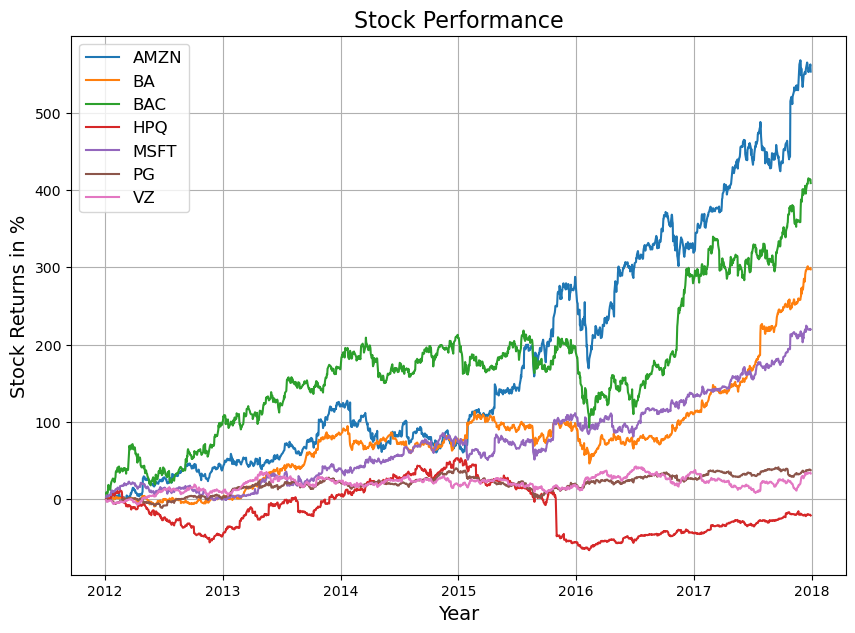

In [47]:
# Plot the percentage returns of  the stocks

plt.figure(figsize=(10, 7)) # Set figure size
for column in df_change.columns.values: # For each value in each column
    plt.plot(df_change.index, (df_change + 1).cumprod()[column] * 100 - 100, label=column) # Calculate the cumulative returns in each column'

plt.legend(loc='best', fontsize=12)
plt.ylabel('Stock Returns in %',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Stock Performance',fontsize=16)
plt.grid()
plt.show()

### c. Calculate the momentum factor
We will create our momentum factor here based on the past one year stock performance. We will calculate it as the difference between the price today and the prior 12 month's average stock price. This is slightly different than calculating the 1-year return for the stock. There are many ways to construct a momentum factor, this is just one of those ways.

In [48]:
# You can assume there are 21-working days per month to generate the yearly average price
# days per month * months per year
yearly_working_days = 21 * 12

# Calculate the momentum values for each stock by subtracting the stock price from the mean value
# Remember to use the price data here, not the return data
momentum_factor = df - df.rolling(yearly_working_days, min_periods=10).mean()

In [49]:
# Let us check the momentum values of the stocks
# Be sure to examine the head and tail because you will have missing values at the beginning
momentum_factor.head(15)

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-17,2.703000,0.672000,0.105000,-0.123000,0.479500,-0.044000,0.129000


In [50]:
# Create two dataframes to hold the buy-sell signals for momentum_buy_stocks and momentum_sell_stocks momentum values of stocks
# The momentum_buy_stocks dataframe contains values of the stocks that are more than 0 (ie. price higher today)
momentum_buy_stocks = momentum_factor[momentum_factor > 0]

# The momentum_sell_stocks dataframe contains values of the stocks that are less than 0 (ie. price lower today)
momentum_sell_stocks = momentum_factor[momentum_factor < 0]

### d. How does the factor work?

This factor model is a momentum based. You buy a stock that has a higher price than the average price over some historical period and you sell a stock that has a lower price than the average price over some historical period. The assumption is that the momentum we calculate will continue going forward. We will purchase all stocks in momemtum_buy and sell all stocks in momentum_sell. All purchases and sales will be allocated the same amount of money so that our final portfolio return is just the mean of the the individual returns.

### e. Calculate our performance

In [51]:
# We can see that we are purchasing stocks with a value and not purchasing those with a NaN
momentum_buy_stocks.sample(20)

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2014-10-23,NaN,NaN,0.672750,3.199976,4.540500,2.108730,NaN
2017-01-17,102.972302,23.540659,6.329333,1.265282,6.885417,1.195675,1.012143
2014-04-01,19.178929,12.338913,2.664651,7.802937,6.497917,0.734742,NaN
2013-11-06,78.157631,38.872940,1.255813,4.811329,7.207107,6.337956,2.822893
2015-02-03,38.361369,19.230290,NaN,2.996722,NaN,2.724683,NaN
2017-02-14,107.958135,30.863036,7.545921,2.301984,7.942028,3.252063,NaN
2016-01-27,84.922643,NaN,NaN,NaN,4.102242,0.307024,1.953968
2016-05-27,142.173060,NaN,NaN,NaN,2.307798,3.287381,2.768016
2013-11-05,81.340345,39.595282,1.241766,4.715813,5.700123,5.013036,2.337933
2014-12-16,NaN,NaN,0.463286,3.917952,3.123365,7.395952,NaN


In [52]:
df_change

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2012-01-04,-0.008490,0.001482,0.001724,-0.000751,0.023725,-0.000449,-0.013088
2012-01-05,0.000563,-0.010763,0.086059,-0.003759,0.010219,-0.004192,-0.006886
2012-01-06,0.028152,0.006120,-0.020602,-0.003774,0.015354,-0.002405,-0.015665
2012-01-09,-0.022178,0.007434,0.014563,0.001515,-0.012987,0.004219,0.001044
2012-01-10,0.004368,0.006306,0.057416,0.009455,0.003605,-0.004652,0.005212
...,...,...,...,...,...,...,...
2017-12-22,-0.005448,0.000237,0.002012,0.000471,0.000117,0.005018,0.003396
2017-12-26,0.007190,0.000881,-0.003347,-0.001411,-0.001286,0.003799,0.000564
2017-12-27,0.004674,0.000880,-0.001679,0.001884,0.003630,-0.004109,0.001127
2017-12-28,0.003248,0.002469,0.002355,-0.005642,0.000117,-0.000326,0.002815


In [53]:
momentum_buy_stocks.notnull()

,AMZN,BA,BAC,HPQ,MSFT,PG,VZ
2012-01-03,False,False,False,False,False,False,False
2012-01-04,False,False,False,False,False,False,False
2012-01-05,False,False,False,False,False,False,False
2012-01-06,False,False,False,False,False,False,False
2012-01-09,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2017-12-22,True,True,True,True,True,True,True
2017-12-26,True,True,True,True,True,True,True
2017-12-27,True,True,True,True,True,True,True
2017-12-28,True,True,True,True,True,True,True


In [54]:
# Calculate the factor performance using the returns and signals
# We buy the buy_stocks and sell the sell_stocks
momentum_performance = ((df_change * momentum_buy_stocks.notnull()) - (df_change * momentum_sell_stocks.notnull())).mean(axis=1)
momentum_performance.head(25)

2012-01-03         NaN
2012-01-04    0.000000
2012-01-05    0.000000
2012-01-06    0.000000
2012-01-09    0.000000
2012-01-10    0.000000
2012-01-11    0.000000
2012-01-12    0.000000
2012-01-13    0.000000
2012-01-17    0.000614
2012-01-18    0.016107
2012-01-19    0.008183
2012-01-20    0.012396
2012-01-23    0.007629
2012-01-24    0.001900
2012-01-25    0.002043
2012-01-26    0.002030
2012-01-27    0.002495
2012-01-30   -0.003175
2012-01-31    0.003197
2012-02-01    0.022714
2012-02-02   -0.000683
2012-02-03    0.018707
2012-02-06   -0.000351
2012-02-07   -0.001412
dtype: float64

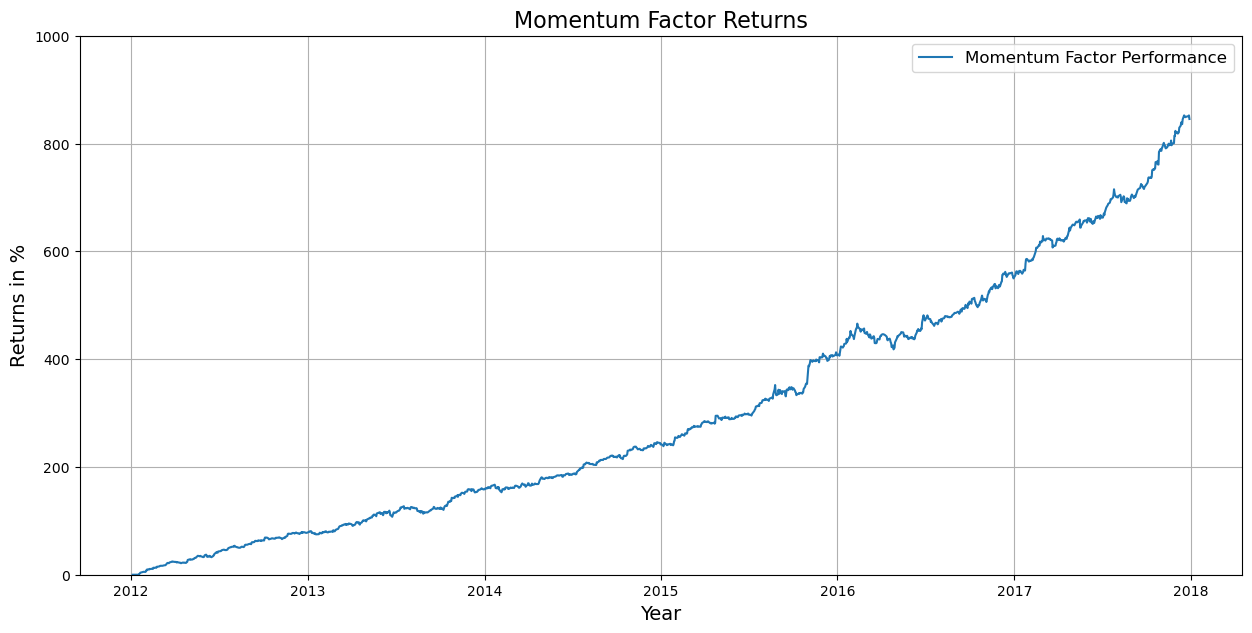

In [55]:
# Plot our performance
plt.figure(figsize=(15, 7))
plt.plot(((momentum_performance + 1).cumprod()-1) * 100, label='Momentum Factor Performance')
plt.legend(loc='best', fontsize=12)
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Momentum Factor Returns', fontsize=16)
plt.ylim(0, 1000)
plt.grid()
plt.show()

## 6. Portfolio performance
In this last section we will examine a few different methods for evaluating portfolio performance.
- Annualized returns
- Annualized volatility
- Sharpe ratio
- Beta
- Treynor ratio
- Information ratio
- Maximum drawdown

### a. Get the data

In [56]:
# Create a dataframe returns to store the returns of the portfolio
returns = pd.read_csv('portfolio_performance.csv', index_col=0)

# Convert the index to datetime format
returns.index = pd.to_datetime(returns.index)

returns.head()

,portfolio,market
Date,,
2012-01-03,0.000000,0.000188
2012-01-04,0.000000,0.002944
2012-01-05,0.000000,-0.002537
2012-01-06,0.000000,0.002262
2012-01-09,-0.003117,0.008886


In [57]:
returns.describe()

,portfolio,market
count,1508.000000,1499.000000
mean,0.000142,0.000522
std,0.004397,0.007597
min,-0.027984,-0.039414
25%,-0.001903,-0.002967
50%,0.000030,0.000448
75%,0.002058,0.004608
max,0.027052,0.039034


In [58]:
print(returns['portfolio'].mean() / returns['portfolio'].std())
print(returns['market'].mean() / returns['market'].std())

0.03234994280923537
0.06876919108037777


### b. Annualized volatility
$Annual\ volatility = \sqrt{252}*\sqrt{variance}$ <br>
$Annual\ volatility = \sqrt{252}*\sigma$

In [59]:
# Calculate the daily standard deviation
trading_days = 252

daily_std_dev = returns['portfolio'].std()

# Calculate the annualized volatility
annual_volatility = daily_std_dev * np.sqrt(trading_days) * 100
'The annualized volatility is %.2f%%' % annual_volatility

'The annualized volatility is 6.98%'

### c. Sharpe ratio
The Sharpe ratio is the excess return calculated as total returns minus the risk-free rate of return per unit of volatility. Generally, risk-free return is the return on the risk-free assets such as government bonds. The excess returns are due to the 'extra risk' taken by the investor on investing in risky assets.

It tells whether the returns on a portfolio are due to good investment decision or the result of excessive risk taken. Higher Sharpe ratio is always preferable over the lower ones.

The Sharpe Ratio can be used to compare the portfolio with the benchmark to get to know how your portfolio is repaying for the risk taken on the investment.

$Sharpe\ ratio = \frac{R_p - R_f}{\sigma_p}$

where: <br>
$R_p$ is the portfolio return <br>
$R_f$ is the risk free return <br>
$\sigma_p$ is the standard deviation of the portfolio

In [60]:
# The annual risk-free rate of 2% is assumed
risk_free_rate = 0.02

In [61]:
# Calculate the daily risk-free return by dividing the annual risk-free return by number of trading days
daily_risk_free_return = risk_free_rate/trading_days

# Calculate the excess returns by subtracting the daily returns by daily risk-free return
excess_daily_returns = returns['portfolio'] - daily_risk_free_return

# Calculate the sharpe ratio using the given formula
# It is multiplied by square root of trading days to get the annualized value
sharpe_ratio = (excess_daily_returns.mean() / excess_daily_returns.std()) * np.sqrt(trading_days)
'The Sharpe ratio is %.2f' % sharpe_ratio

'The Sharpe ratio is 0.23'

### d. Beta
Beta will capture the relationship between the portfolio returns and teh market returns.

$Beta = \frac{Cov(R_p, R_m)}{Var(R_m)}$


In [62]:
# Calculate the covariance between market returns and portfolio returns
covariance_matrix = returns[['market', 'portfolio']].cov()
covariance_value = covariance_matrix.iloc[0]['portfolio']

# Calculate the market variance
market_variance = returns['market'].var()

# Calculate the beta value using the given formula
beta = covariance_value/market_variance
'The beta is %.2f' % beta

'The beta is 0.17'

### e. Treynor ratio
Treynor ratio is the variation in the denominator of the Sharpe ratio by replacing the total standard deviation with the beta of the portfolio and thus compares performance to the overall market. It also highlights the risk-adjusted performance of the portfolio. Higher the Treynor ratio, more suitable the investment is. The ratio is based on historical returns data.

$Treynor\ ratio = \frac{R_p - R_f}{\beta_p}$

In [63]:
# Calculate the Treynor ratio using the above formula
# It is multiplied by trading days to get the annualized value
treynor_ratio = (excess_daily_returns.mean()*trading_days)/beta
'The treynor ratio is %.2f' % treynor_ratio

'The treynor ratio is 0.10'

### f. Information ratio
Information ratio tells the portfolio's return in excess of the benchmark's return with respect to the volatility of these returns.  It tells an investor how much excess return is generated from the excess risk taken with respect to its benchmark. A Higher ratio implies that the fund is more consistent and better performing. The range between 0.4-0.6 is considered good and the value greater than 1 is considered excellent but is found quite rare.

$Information\ ratio = \frac{R_p - R_m}{\sigma_{pm}}$

where: <br>
$R_p$ is the return on the portfolio <br>
$R_m$ is the return on the market <br>
$\sigma_{pm}$ is the standard deviation between the portfolio and market returns

In [64]:
# Calculate the Information Ratio using the above formula
average_daily_returns = returns['portfolio'].mean()
information_ratio = (average_daily_returns - returns['market'].mean()) / (returns['portfolio'] - returns['market']).std() * np.sqrt(trading_days)
'The information raio is %.2f' % information_ratio

'The information raio is -0.79'

### g. Maximum drawdown
The maximum drawdown is a measure to assess the risk of a given portfolio by measuring the peak-to-trough decline in the value of the portfolio. The value is presented as a percentage of the peak value.

$Maximum\ drawdown = \frac{L - P}{P}$

where: <br>
$L$ is the lowest value before the new high <br>
$P$ is the maximum value before the largest drop

Maximum Drawdown only measures the size of the largest loss but it doesn't say how frequently the losses are occurring and how much time it took to recover from those losses. A low value of maximum drawdown is preferred as it indicates that losses from the investment in the portfolio are less. This will become more clear as we calculate this measure.

In [65]:
# Cumulative product of portfolio returns
cumprod_ret = (returns['portfolio']+1).cumprod()*100

# Cumulative product of market returns
cumprod_market_ret = (returns['market']+1).cumprod()*100

# Convert the index in datetime format
cumprod_ret.index = pd.to_datetime(cumprod_ret.index)

# Define a variable trough_index to store the index of lowest value before new high
trough_index = (np.maximum.accumulate(cumprod_ret) - cumprod_ret).idxmax()

# Define a variable peak_index to store the index of maximum value before largest drop
peak_index = cumprod_ret.loc[:trough_index].idxmax()

# Calculate the maximum drawdown using the given formula
maximum_drawdown = 100 * ((cumprod_ret[trough_index] - cumprod_ret[peak_index]) / cumprod_ret[peak_index])
'The maximum drawdown is %.2f%%' % maximum_drawdown

'The maximum drawdown is -10.90%'

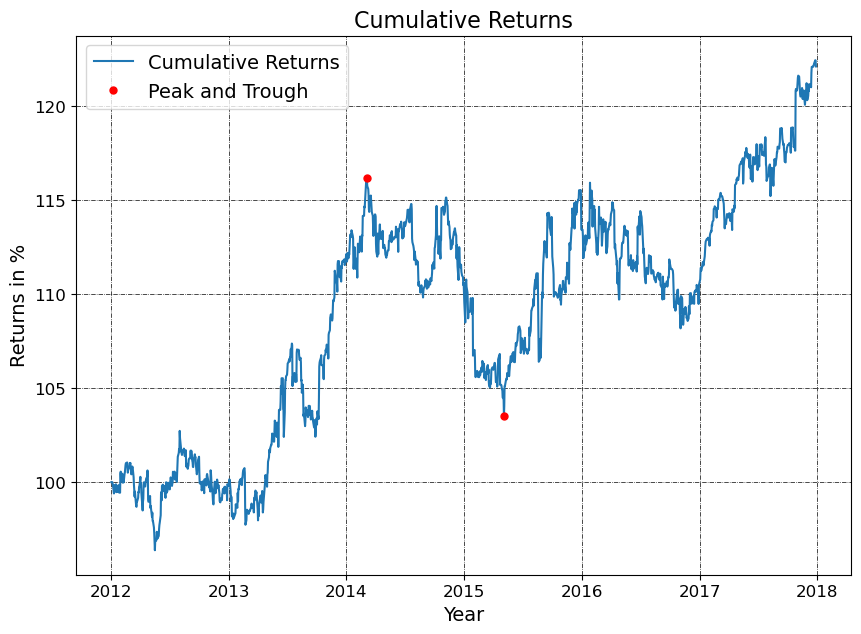

In [66]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Plot the cumulative product of returns
plt.plot(cumprod_ret)

# Plot to represent the peak and trough, represented by red dots.
plt.plot([peak_index, trough_index], [cumprod_ret[peak_index], cumprod_ret[trough_index]], 'o', color='r', markersize=5)

# Define the label for the title of the figure
plt.title("Cumulative Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Returns in %', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Define the label for the legend
plt.legend(["Cumulative Returns", "Peak and Trough"], fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

plt.show()